### 산술연산
 - 행/열 인덱스를 기준으로 모든 원소를 정렬한다.
 - 동일한 위치에 있는 원소끼리 일대일 대응시킨다.
 - 일대일 대응이 되는 원소끼리 연산을 처리한다.

In [1]:
# 시리즈 vs 시리즈
# 라이브러리 불러오기
import pandas as pd

# 딕셔너리 데이터로 판다스 시리즈 만들기
st1 = pd.Series({'국어':100,'영어':80, '수학':90})
st2 = pd.Series({'수학':80,'국어':90, '영어':80})

print(st1)
print()
print(st2)

국어    100
영어     80
수학     90
dtype: int64

수학    80
국어    90
영어    80
dtype: int64


In [2]:
add=st1+st2
mul=st1*st2
sub=st1-st2
div=round((st1/st2),2) # 반올림해서 보여줄 자리수 선택
display(div)

a = pd.Series(add,name='덧셈')
m = pd.Series(mul,name='곱셈')
s = pd.Series(sub,name='뺄셈')
d = pd.Series(div,name='나눗셈')

df=pd.concat([a,m,s,d],axis=1)
result = pd.DataFrame([add,sub,mul,div],index=['덧셈','뺄셈','곱셈','나눗셈'])
display(df)
display(result)
type(add) #시리즈를 묶어서 데이터프레임으로 생성 가능

국어    1.11
수학    1.12
영어    1.00
dtype: float64

,덧셈,곱셈,뺄셈,나눗셈
국어,190,9000,10,1.11
수학,170,7200,10,1.12
영어,160,6400,0,1.00


,국어,수학,영어
덧셈,190.00,170.00,160.0
뺄셈,10.00,10.00,0.0
곱셈,9000.00,7200.00,6400.0
나눗셈,1.11,1.12,1.0


pandas.core.series.Series

In [3]:
# NaN을 포함한 연산 결과는 NaN으로 처리
# 해당 인덱스가 존재하지 않는 경우도 NaN을 반환

import numpy as np
st1 = pd.Series({'국어':np.nan,'영어':80, '수학':90})
st2 = pd.Series({'수학':80,'국어':90})

add=st1+st2
mul=st1*st2
sub=st1-st2
div=round((st1/st2),2)

result = pd.DataFrame([add,sub,mul,div],index=['덧셈','뺄셈','곱셈','나눗셈'])
display(result)

,국어,수학,영어
덧셈,NaN,170.00,NaN
뺄셈,NaN,10.00,NaN
곱셈,NaN,7200.00,NaN
나눗셈,NaN,1.12,NaN


In [52]:
# Q. 데이터프레임 result에서 NaN값을 0으로 대체하세요.
#  - 연산 메소드 사용, NaN 대신 0으로 입력(sr_add=student1.add(student2,fill_value=0))

st1 = pd.Series({'국어':np.nan,'영어':80, '수학':90})
st2 = pd.Series({'수학':80,'국어':90})

#NaN 값이 있는 시리즈 연산
# 객체 사이에 공통 인덱스가 없거나 NaN이 포함된 경우 연산 결과는 NaN으로 반환
# 라이브러리 불러오기
import pandas as pd
import numpy as np

# 두 학생의 과목별 점수로 사칙연산 수행(연산 메소드 사용, fill_value=0)
# st1 국어 점수와 st2 영어 점수는 NaN 대신 0으로 입력

sr_add = st1.add(st2, fill_value=0)
sr_sub = st1.sub(st2, fill_value=0)
sr_mul = st1.mul(st2, fill_value=0)
sr_div = st1.div(st2, fill_value=0)

result=pd.DataFrame([sr_add,sr_sub,sr_mul,sr_div], index =['덧셈','뺄셈','곱셈','나눗셈'])
display(result) #영어가 inf인 이유는 0으로 나눠서 무한대이기 때문에 처리된 값

,국어,수학,영어
덧셈,90.0,170.000,80.0
뺄셈,-90.0,10.000,80.0
곱셈,0.0,7200.000,0.0
나눗셈,0.0,1.125,inf


In [5]:
# CSV 파일 읽고, 저장하기(pd.read_csv)
# with open('read_csv_sample.csv','w') as f:
#     f.write('3')

In [6]:
#라이브러리 불러오기
import pandas as pd

#파일 경로를 찾고, 변수 file_path에 저장
file_path = 'read_csv_sample.csv'

# read_csv() 함수로 데이터프레임
df1 = pd.read_csv(file_path)
display(df1)
print(type(df1))

,c0,c1,c2,c3,c4
0,3,4,5,6,8
1,1,2,3,4,5
2,5,2,4,6,5


<class 'pandas.core.frame.DataFrame'>


In [7]:
# read_csv() 함수로 데이터프레임 변환, 변수 df2에 저장. header=None 옵션
df2 = pd.read_csv(file_path,header=None) # 헤더가 없는 옵션
display(df2)

,0,1,2,3,4
0,c0,c1,c2,c3,c4
1,3,4,5,6,8
2,1,2,3,4,5
3,5,2,4,6,5


In [8]:
# read_csv() 함수로 데이터프레임 변환, 변수 df3에 저장. index_col = None 옵션
df3 = pd.read_csv(file_path, index_col=None) # 인덱스가 없는 옵션
display(df3)

,c0,c1,c2,c3,c4
0,3,4,5,6,8
1,1,2,3,4,5
2,5,2,4,6,5


In [10]:
# read_csv() 함수로 데이터프레임 변환, 변수 df4에 저장. index_col='c0'옵션
df4 = pd.read_csv(file_path, index_col='c0') #c0열을 index로 설정
display(df4)

,c1,c2,c3,c4
c0,,,,
3,4,5,6,8
1,2,3,4,5
5,2,4,6,5


In [13]:
# 데이터 프레임을 csv 파일로 저장
df4.to_csv('df5.csv') #기존에 저장된 데이터프레임을 '원하는 이름'으로 변경하여 저장
df5 = pd.read_csv('df5.csv') # 원하는 csv파일을 불러온다.
display(df5) # 출력

,c0,c1,c2,c3,c4
0,3,4,5,6,8
1,1,2,3,4,5
2,5,2,4,6,5


## JSON 파일 읽고 쓰기

In [16]:
# JSON 파일은 데이터 공유 목적으로 개발된 특수한 파일
df4.to_json('df_j.json')
df_j = pd.read_json('df_j.json') # json 파일 읽기
df_j

,c1,c2,c3,c4
3,4,5,6,8
1,2,3,4,5
5,2,4,6,5


## 바이너리 파일로 읽고 쓰기

In [18]:
#데이터프레임을 바이너리 파일로 저장
df5.to_pickle('df6.pkl')
df6=pd.read_pickle('df6.pkl') #피클형태로 저장한걸 불러오기.(데이터용량적으로 이득을 취할 수 있다.)
df6

,c0,c1,c2,c3,c4
0,3,4,5,6,8
1,1,2,3,4,5
2,5,2,4,6,5


In [20]:
# 파이썬 외장함수 (pickle)
# pickle 은 객체의 형태를 유지하면서 파일에 저장하고 불러올 수 있게 하는 모듈
# dump() 함수를 이용하여 딕셔너리 객체인 data를 파일에 저장
import pickle
f = open('test.txt', 'wb')
data = {1:'python', 2:'you need'}
pickle.dump(data,f) #파이썬에서 피클을 저장할 때 덤프 사용
f.close()

In [23]:
# pickle.load를 이용해서 딕셔너리 객체 상태 그대로 불러올 수 있음
import pickle
f = open('test.txt','rb')
data=pickle.load(f)
print(data)

{1: 'python', 2: 'you need'}


In [30]:
import os
os.getcwd() #현재 작업폴더 위치 호출

'C:\\Users\\USER\\workspace\\ml_python'

### 타이타닉 생존자 예측모델 개발 및 평가(아래 사항 반영) - 추후 검증용 데이터와 학습용 데이터를 나눠서 진행

#### Titanic data 전처리

 - 분석 데이터 : train.csv
 - 재사용 가능한 전처리 사용자 함수 작성하여 일괄 전처리 Null값 처리 : Age는 평균나이, 나머지 칼럼은 'N'값으로 변경 Cabin 칼럼은 선실 번호 중 선실 등급을 나타내는 첫 번째 알파벳이 중요하며 앞문자만 추출 문자열 칼럼 레이블 인코딩 불필요한 속성 칼럼 삭제(PassengerId, Name, Ticket)
 - 탐색적 분석 필수 항목 : groupby() 또는 sns.barplot() 사용하여 성별 생존자, 객실 등급별 성별 생존자, 연령병(카테고리 분류) 생존자
 - 훈련 데이터 : 검증 데이터 = 8:2
 - 분류 모델 : Dicision Tree, Random Forest, Logistic Regression 3개 모두 적용
 - 평가 : 사이킷 런 metrics 사용, 다음 항목들을 포함하는 사용자 함수 def get_clf_eval(y_test, pred)을 작성하여 일괄 처리 confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
 - 모델 개발 및 평가 결과에 대한 종합 의견

#### 컬럼정보
- Passengerid : 승객번호
- Survived : 생존여부(1:생존, 0:사망)
- Pclass : 선실 등급(1: 1st, 2:2nd, 3:3rd)
- Name : 승객 이름
- Sex : 승객 성별
- Age : 승객 나이
- SibSp : 동반한 형제자매, 배우자 수
- Patch : 동반한 부모, 자식 수
- Ticket : 티켓의 고유 넘버
- Fare : 티켓의 요금
- Cabin : 객실 번호
- Embarked : 승선한 항구명(C:Cherbourg, Q:Queenstown, S:Southampton)

In [92]:
titanic_df = pd.read_csv('train_df.csv')
display(titanic_df.head()) # 빈칸일 때는 앞에 5개만 보인다.
print(titanic_df.columns) # 칼럼 정보만 보고 싶을 경우
print(titanic_df.shape) # 관측치가 891개, 칼럼이 12개 확인 가능
print(titanic_df.info()) #칼럼별 널값 확인

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')
(891, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [93]:
#데이터 살펴보기
#print(titatic_df.shape)
#print()
print(titanic_df.keys())
print()
print(titanic_df.info)
print()
display(titanic_df.describe(),'describe')
print()
display(titanic_df.describe(include='all'),'describe all')

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

<bound method DataFrame.info of      PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (L

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


'describe'

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Leonard, Mr. Lionel",male,NaN,NaN,NaN,CA. 2343,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


'describe all'

In [94]:
# 전처리 내역 : 
# train data checking : Age, Cabin, Embarked 칼럼 null 처리 -> Null 값을 Age는 평균
# Cabin, Embarked 는 'N' 값으로 변환
# Cabin 속성값 정리 : 선실 번호 중 선실 등급을 나타내는 첫 번째 알파벳만 추출
# 불필요한 칼럼 삭제 : PassengerId, Name, Ticket
# 문자열 데이터 인코딩 : Sex, Cabin, Embarked
# 범주형 취급 : Pclass, Survived
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [95]:
titanic_df['Age'].value_counts() # 좌측 열이 해당 값, 우측 열이 카운트 수(24살이 30명)
titanic_df['Cabin'].value_counts() # 맨 앞에 있는 알파벳만 추출해서 분석
titanic_df['Embarked'].value_counts() # 항구별 탑승 인원 파악
titanic_df['Sex'].value_counts() # 남 577, 여 314 명수 확인 가능
titanic_df['Pclass'].value_counts() # 3등급 491명, 2등급 184, 1등급 216명
titanic_df['Fare'].value_counts() # 8.05달러 43명, 13달러 42명 ...

8.0500     43
13.0000    42
7.8958     38
7.7500     34
26.0000    31
           ..
8.4583      1
9.8375      1
8.3625      1
14.1083     1
17.4000     1
Name: Fare, Length: 248, dtype: int64

In [96]:
#Null 처리 함수
print(titanic_df['Age'].isnull().sum(),'\n--') # 널의 합계를 보여달라는 의미 : Age의 널값 177개 확인 가능
print(titanic_df.Age.isnull().sum(),'\n--') # .Age로도 확인 가능
titanic_df['Age'].fillna(titanic_df['Age'].mean(), inplace=True) #Age의 na 값을 Age의 평균값으로 채워라. inplace=True 원본에 반영
print()
print(titanic_df['Age'].isnull().sum(),'null') # null값이 0인걸 확인 가능
print()
print(titanic_df.Age.value_counts(),'vcounts') # Age의 value값이 몇개인지 요소별로 확인가능

177 
--
177 
--

0 null

29.699118    177
24.000000     30
22.000000     27
18.000000     26
28.000000     25
            ... 
55.500000      1
53.000000      1
20.500000      1
23.500000      1
0.420000       1
Name: Age, Length: 89, dtype: int64 vcounts


In [98]:
print(titanic_df['Embarked'].value_counts())
print()
print(titanic_df['Embarked'].isnull().sum(),'null1')
print()
titanic_df['Embarked'].fillna('N', inplace=True)
print(titanic_df['Embarked'].isnull().sum(),'null2')

S    644
C    168
Q     77
N      2
Name: Embarked, dtype: int64

0 null1

0 null2


In [104]:
titanic_df.groupby(['Sex','Survived'])['Survived'].count() # 성별별 생존자 (남자 사망자가 상대적으로 더 많은걸 확인 가능)
titanic_df.groupby(['Sex','Pclass'])['Pclass'].count() # 등급별 생존률 확인 가능

Sex     Pclass
female  1          94
        2          76
        3         144
male    1         122
        2         108
        3         347
Name: Pclass, dtype: int64

### 탐색을 위한 시각화

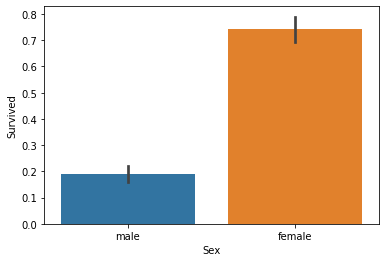

In [105]:
import seaborn as sns
sns.barplot(x='Sex', y='Survived', data=titanic_df)

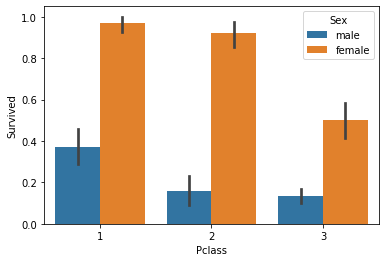

In [113]:
# 데이터 탐색 : 어떤 유형의 승객이 생존 확률이 높았는지 확인
# 성별, 부자와 가난한 사람 간의 생존 확률 : 객실 등급별 성별에 따른 생존 확률
# 여성이 남성보다 전반적으로 생존률이 높고 특히 일등석, 이등석 여성 승객의 생존율이 높음
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
titanic_df.groupby(['Sex','Survived'])['Survived'].count()
sns.barplot(x='Pclass', y='Survived', hue='Sex', data=titanic_df) # hue 는 범례를 나타낸다.

#### 오차막대(error bar) 수정하기
seaborn은 barplot() 함수를 사용할 때 각 막대에 기본적으로 오차막대(error bar)가 함께 나타나도록 되어있다. 막대의 길이가 길 수록 자료 값들이 더 많이 퍼져있다고 이해할 수 있다. 오차막대를 그리는 범위는 '데이터를 기반으로 유사한 상황의 95%가 이 범위 내에서 결과를 얻을 것'을 의미한다.

In [115]:
# 카테고리화 필요성
titanic_df.Age.value_counts()

29.699118    177
24.000000     30
22.000000     27
18.000000     26
28.000000     25
            ... 
55.500000      1
53.000000      1
20.500000      1
23.500000      1
0.420000       1
Name: Age, Length: 89, dtype: int64

In [177]:
def get_category(age):
    cat = ''
    if age <= 5:
        cat = 'Baby'
    elif age <=12:
        cat = 'Child'
    elif age <=18:
        cat = 'Teenager'
    elif age <=25:
        cat = 'Student'
    elif age <=35:
        cat = 'Young Adult'
    elif age <=60:
        cat = 'Adult'    
    else:
        cat = 'Elderly'
        
    return cat

titanic_df['Age_cat'] = titanic_df['Age'].apply(lambda x : get_category(x))
# titanic_df['Age'] 에서 튀어나온 값이 lambda x 에 저장된 후 get_category(x)를 실행하여 return되는 값을 반환
print(titanic_df['Age'][0])# Series는 순서는 존재하지만 데이터프레임에서 행렬로 값을 임의로 뽑을때는 무작위 추출
titanic_df[['Age','Age_cat']]

22.0


,Age,Age_cat
0,22.000000,Student
1,38.000000,Adult
2,26.000000,Young Adult
3,35.000000,Young Adult
4,35.000000,Young Adult
...,...,...
886,27.000000,Young Adult
887,19.000000,Student
888,29.699118,Young Adult
889,26.000000,Young Adult


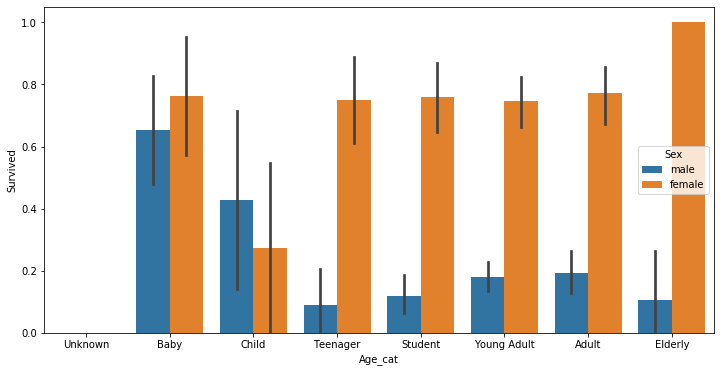

In [179]:
# titanic_df['Age_cat'].unique()
# 인사이트 : Baby의 생존율이 높고 Child를 제외한 모든 연령대에서 여성 승객의 생존율이 높다.
# Sex, Age, Pclass 생존율에 영향을 미치는 중요한 feature임을 확인할 수 있다.
plt.figure(figsize=(12,6)) #그림의 크기(가로폭,세로폭)
group_names = ['Unknown', 'Baby','Child','Teenager','Student','Young Adult', 'Adult', 'Elderly']
sns.barplot(x='Age_cat', y='Survived', hue='Sex', data=titanic_df, order=group_names) #order=group_names는 bar를 정렬할 때 순서
titanic_df.drop('Age_cat', axis=1, inplace=True) # 원본데이터를 보존시키기 위해 삽입했던 Age_cat 열 삭제